# EDA on Titanic Dataset:-

## Import Libraries:

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

## The Data:

 

Here I can take the 'Titanic dataset' to findout the survived people.

In [23]:
df = pd.read_csv('C:\\Users\\91891\\Documents\\Titanic-Train-Data.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Findout the missing data:

In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df.isnull().sum()  # findout how many null values are present..

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
df.info()   # information of data..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
df.describe()  # it gives the mean,std etc..

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Findout the null values using Heat map:

<AxesSubplot:>

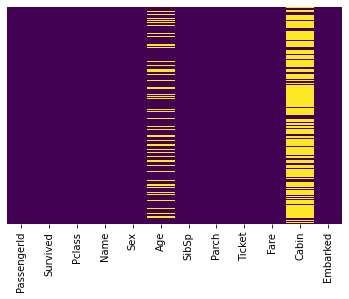

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 So, we can see that most of the null values are present in 'Age' and 'Cabin' columns.

### Fill the null values in 'Age' column:

In [28]:
x = df['Age'].median()  # here I findout the most repeated value in age column using mode..
x

28.0

In [29]:
# now I fill the null value with x..

df['Age'].fillna(x, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### One-hot-encoding:

- One-hot-encoding means convert the categorical data into Numerical data using get-dummies.

In [30]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### Label-Encoding:

- Applying the label-encoding to the sex column.

In [31]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

### Now drop the unwanted columns form the data..

In [32]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,28.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [33]:
# here we concatinate the both sex and embark columns..

df = pd.concat([df, embark], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [34]:
df.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,28.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


### Now findout any null values present in data using heatmap..

<AxesSubplot:>

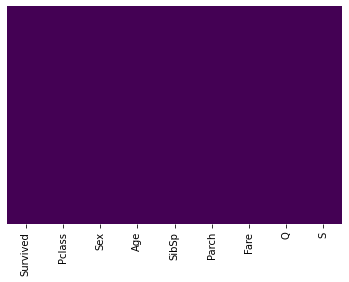

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- We see the total data appears in black color means, there is no null-value present in data.

### Findout the correlation between columns..

In [36]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.074115,0.125722
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.031415,-0.014665
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.026354,0.070941
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.081228,0.063036
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.117216,-0.166603
Q,0.003650,0.221009,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,1.000000,-0.496624
S,-0.155660,0.081720,0.125722,-0.014665,0.070941,0.063036,-0.166603,-0.496624,1.000000


## Data Visualization:

<AxesSubplot:>

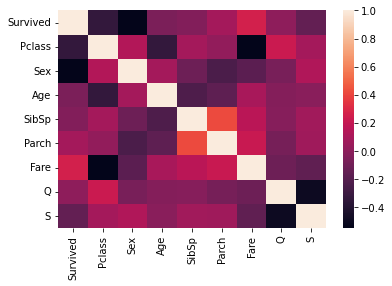

In [37]:
sns.heatmap(df.corr())

Here we see in the heatmap, it gives the correlation between columns. Here 'SibSp', 'Parch' columns have same relation.
Now combine them into a 'Family'.

In [38]:
# here 'sibsp' and 'parch' gives the same meaning, so combine into a family..

df['Family'] = df['SibSp'] + df['Parch']+1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Family
0,0,3,1,22.0,1,0,7.2500,0,1,2
1,1,1,0,38.0,1,0,71.2833,0,0,2
2,1,3,0,26.0,0,0,7.9250,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,1,2
4,0,3,1,35.0,0,0,8.0500,0,1,1


In [39]:
df.drop(['SibSp','Parch'],axis = 1,inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Q,S,Family
0,0,3,1,22.0,7.2500,0,1,2
1,1,1,0,38.0,71.2833,0,0,2
2,1,3,0,26.0,7.9250,0,1,1
3,1,1,0,35.0,53.1000,0,1,2
4,0,3,1,35.0,8.0500,0,1,1


In [40]:
df = df.drop(['Q','S'], axis = 1)
df

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,2
2,1,3,0,26.0,7.9250,1
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1
887,1,1,0,19.0,30.0000,1
888,0,3,0,28.0,23.4500,4
889,1,1,1,26.0,30.0000,1


### Bar Graph between Sex Vs Age:-

C:\Users\91891\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Age')

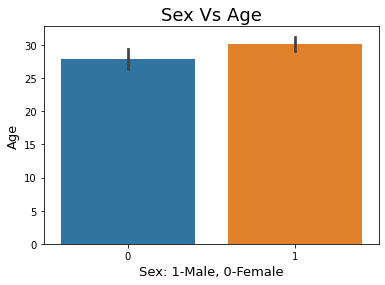

In [60]:
x = df['Sex']
y = df['Age']
sns.barplot(x, y)
plt.title('Sex Vs Age',size=18)
plt.xlabel('Sex: 1-Male, 0-Female',size=13)
plt.ylabel("Age", size = 13)

# in sex column 0 for female and 1 for male..

### Sex Vs Age Vs Pclass:

C:\Users\91891\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

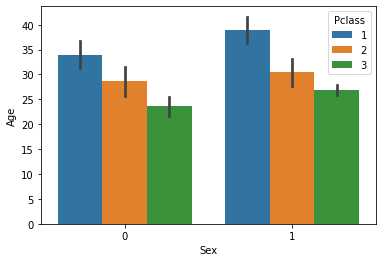

In [75]:

sns.barplot("Sex",'Age',hue="Pclass",data=df)

### Sex Vs Age Vs Pclass using Violinplot: 

C:\Users\91891\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

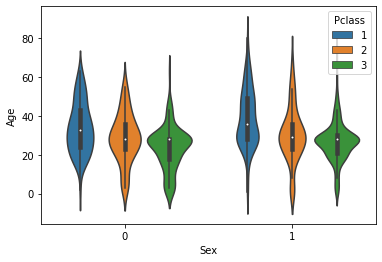

In [76]:
sns.violinplot("Sex",'Age',hue="Pclass",data=df)

### Classifying Age using Distplot:

C:\Users\91891\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


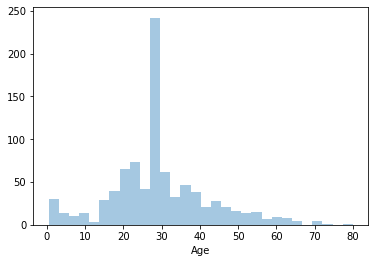

In [80]:
sns.distplot(df['Age'], kde = False)
plt.show()

### Survived Vs Age Vs Pclass using Box-Plot:

C:\Users\91891\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

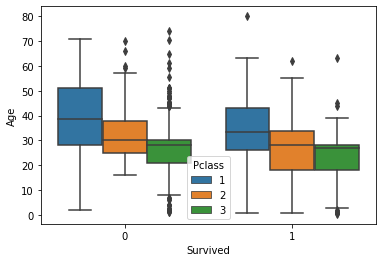

In [82]:
# Here we plot the graph how many people survived according their age and sex..

sns.boxplot("Survived",'Age',hue="Pclass",data=df)

### Model building using Logistic Regression:

In [84]:
x = df.drop('Survived', axis = 1).values
y = df['Survived'].values


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 100)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lrpred = lr.predict(x_test)

#### Accuracy Score:

In [90]:
accuracy_score(y_test, lrpred)

0.7910447761194029